https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification?select=train.csv
![alt text](image.png)

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [88]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [89]:
train_data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [90]:
train_data.price_range.value_counts()

price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64

In [91]:
X = train_data.drop(columns=['price_range'])
Y = train_data['price_range']

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

##### allocate data from train_data to 2 train and validate data

In [104]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size = 0.2, random_state=0)

#### Finding the best K value between 1 and 30

In [105]:

acc = {'k': [], 'train_acc': [], 'val_acc': []}
for k in range (1,30):
    knn = KNeighborsClassifier(n_neighbors = k, metric = 'euclidean')
    knn.fit(X_train, Y_train)
    train_acc = knn.score(X_train, Y_train)
    val_cc = knn.score(X_val, Y_val)
    acc['k'].append(k)
    acc['train_acc'].append(train_acc)
    acc['val_acc'].append(val_cc)
    

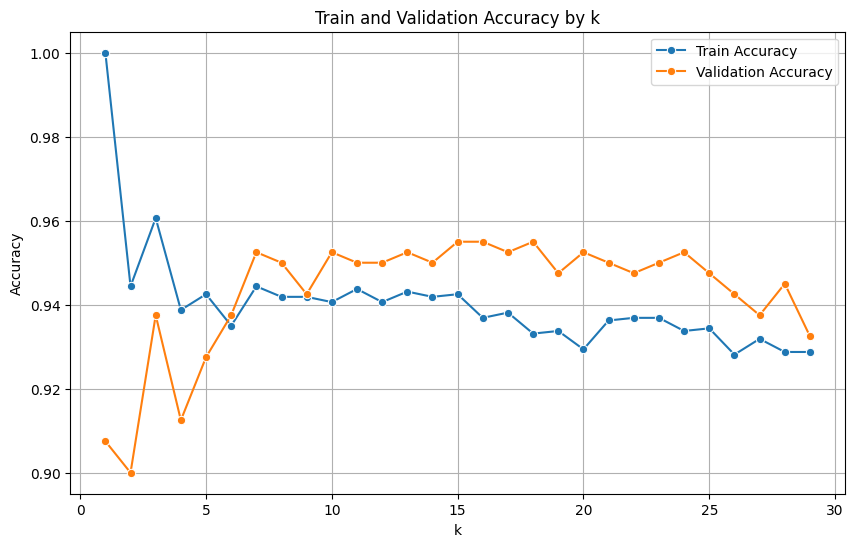

In [106]:
plt.figure(figsize=(10,6))
sns.lineplot(x='k', y='train_acc', data = acc, marker = 'o', label = 'Train Accuracy')
sns.lineplot(x='k', y = 'val_acc', data = acc, marker = 'o', label = 'Validation Accuracy')
plt.title('Train and Validation Accuracy by k')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

#####  Best K value = 9

In [107]:
best_k = 9
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=9)

In [108]:
test_data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

In [111]:
test_results = test_data.copy()

In [113]:

test_predictions = knn.predict(test_data)

In [114]:
test_results["Predicted Price Range"] = test_predictions
test_results.to_csv("test_result.csv")